¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd #Libreria necesaria para trabajar con dataframes
import numpy as np #libreria que contiene algunas funciones para trabajar con numeros entre otras
from matplotlib import pyplot as plt #libreria para realizar los graficos

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';') #Leer la ruta del archivo csv especificando como separador al simbolo ;
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
print(orders.describe())#Funcion para ver calculos generales sobre los datos del dataframe
print()
print(orders.head(5)) #Funcion para obtener 5 datos al azar del dataframe
print()
orders.info() #Funcion para ver informacion general de los datos del dataframe

           order_id        user_id   order_number      order_dow  \
count  4.789670e+05  478967.000000  478967.000000  478967.000000   
mean   1.709947e+06  102966.537475      17.157808       2.775058   
std    9.869480e+05   59525.328991      17.704688       2.045869   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564685e+05   51414.000000       5.000000       1.000000   
50%    1.709522e+06  102633.000000      11.000000       3.000000   
75%    2.562990e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478967.000000           450148.000000  
mean           13.446676               11.101751  
std             4.224986                9.189975  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000                7.000000  
75%            16.000000      

In [4]:
# mostrar información del DataFrame
print(products.describe())
print()
print(products.sample(5))
print()
products.info()

         product_id      aisle_id  department_id
count  49694.000000  49694.000000   49694.000000
mean   24847.500000     67.773192      11.728478
std    14345.566475     38.317265       5.850314
min        1.000000      1.000000       1.000000
25%    12424.250000     35.000000       7.000000
50%    24847.500000     69.000000      13.000000
75%    37270.750000    100.000000      17.000000
max    49694.000000    134.000000      21.000000

       product_id                          product_name  aisle_id  \
7762         7763                 Raven Liquid Eyeliner       132   
29204       29205                      Mint (Spearmint)        16   
41556       41557  Original Deli Style Pretzel Crackers       107   
36335       36336               Shin Ramyun Noodle Soup         4   
8320         8321   Italian Blend Fancy Shredded Cheese        21   

       department_id  
7762              11  
29204              4  
41556             19  
36335              9  
8320              16  

<cla

In [5]:
# mostrar información del DataFrame
print(aisles.describe())
print()
print(aisles.sample(5))
print()
aisles.info()

         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000

     aisle_id                          aisle
99        100                        missing
12         13                 prepared meals
70         71  refrigerated pudding desserts
130       131                      dry pasta
36         37                  ice cream ice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
print(departments.describe())
print()
print(departments.sample(5))
print()
departments.info()


       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000

    department_id     department
17             18         babies
2               3         bakery
10             11  personal care
15             16     dairy eggs
12             13         pantry

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
print(order_products.describe())
print()
print(order_products.head())
print()
order_products.info()

           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to

## Conclusiones

-Tenemos 5 dataframes los cuales tienen un archivo csv donde el separador es el simbolo ';'  
-Existen datos ausentes en el dataframe "instacart_orders" en la columna "days_since_prior_order"  
-En promedio los clientes tardan alrededor de 11 dias en hacer otro pedido.  
-En el dataframe "products" faltan valores en la columna "product_name".  
-En los dataframes "aisles" y "departments" no existen datos ausentes.




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de leer los datos y buenas observaciones iniciales
</div>


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.  
-Identificar los nombres de las columnas de cada dataframe para ver que estas tengan una estructura coherente.
-Revisar los posibles valores ausentes y duplicados.  
-Determinar si es mas factible rellenar los valores ausentes en caso de que estos sean numericos ya sea con la media o la mediana.  
-Eliminar los datos duplicados innecesarios.  
-Verificar que el tipo de datos de cada columna sea coherente con el tipo de datos que pretende mostrar.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orders[orders.duplicated()]) 
print()
print('La cantidad de datos duplicados es:', orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?  
Todas fueron realizadas un dia miercoles a las 2 am

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)].value_counts())#Codigo para verificar cuantas veces ocurrio un pedido el dia miercoles a las 2 am


order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
794638    50898    24            3          2                  2.0                       2
1919531   191501   32            3          2                  7.0                       2
2845099   31189    11            3          2                  7.0                       2
467134    63189    21            3          2                  2.0                       2
1112182   202304   84            3          2                  6.0                       2
                                                                                        ..
898850    14380    4             3          2                  30.0                      1
851025    168387   54            3          2                  15.0                      1
819551    29545    15            3          2                  4.0                       1
781491    51960    5             3          2                  30.0                      1
3389

¿Qué sugiere este resultado?  
Probablemente hubo un error en el sistema de recoleccion de datos el dia miercoles a las 2 am ya que varios de los pedidos de ese dia a esa hora se encuentran duplicados.

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print('La cantidad de datos duplicados es:',orders.duplicated().sum())

La cantidad de datos duplicados es: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders['order_id'].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos  
Existian 15 valores duplicados los cuales ocurrieron el mismo dia a la misma hora lo cual puede indicar algun tipo de falla en el sistema de recoleccion de datos por lo tanto varios pedidos se encontraban duplicados, estos al compartir el mismo ID quiere decir que no se trata de un mismo cliente haciendo varios pedidos sino mas bien de un mismo pedido registrado varias veces en el Dataset por lo tanto fueron eliminados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de eliminar los datos duplicados
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products[products.duplicated()]) 
print()
print('La cantidad de datos duplicados es:', products.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

La cantidad de datos duplicados es: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products['department_id'].value_counts())
print()
duplicated_department_id = products.duplicated(subset=['department_id'])
print(duplicated_department_id.value_counts())

11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64

True     49673
False       21
dtype: int64


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
duplicated_products = products.duplicated(subset=['product_name'])
print(duplicated_products.value_counts())

False    48333
True      1361
dtype: int64


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products.duplicated(subset=['product_name']).notna().value_counts())
print(products[products['product_name'].notna()].duplicated().value_counts())

True    49694
dtype: int64
False    48436
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
Aparentemente en este Dataframe no hay filas duplicadas por completo, existen varios nombres de producto repetidos, sin embargo estas tienen ID de producto diferente por lo que puede sugerir que puede ser un mismo producto pero de diferente marca o presentacion, por lo tanto no se ha eliminado ningun dato.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de revisar los datos y buenas observaciones
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments[departments.duplicated()]) 
print()
print('La cantidad de datos duplicados es:', departments.duplicated().sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

La cantidad de datos duplicados es: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments.duplicated(subset=['department_id']).value_counts())

False    21
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
No existen datos duplicados por lo tanto no es necesario hacer nada.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles[aisles.duplicated()]) 
print()
print('La cantidad de datos duplicados es:', aisles.duplicated().sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

La cantidad de datos duplicados es: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles.duplicated(subset=['aisle_id']).value_counts())

False    134
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
No existen datos duplicados por lo tanto no es necesario hacer nada.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products[order_products.duplicated()]) 
print()
print('La cantidad de datos duplicados es:', order_products.duplicated().sum())

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

La cantidad de datos duplicados es: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
No se encontraron explicitamente filas repetidas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, no hay valores duplicados en los últimos dataframes
</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [22]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])
print('La cantidad de productos sin nombre es: ',products['product_name'].isna().value_counts()[True])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
La cantidad de productos sin nombre es:  1258


Describe brevemente cuáles son tus hallazgos.
1258 productos no tienen nombre.

In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products['product_name'].isna()) & (products['aisle_id'] ==100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
El pasillo 100 no tiene nombres de productos.

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products['product_name'].isna()) & (products['department_id'] ==21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
El departamento 21 no tiene nombres de productos.

In [25]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments['department_id']== 21])
print()
print(aisles[aisles['aisle_id']== 100])

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.  
Probablemente los datos de ese departamento y pasillo se han perdido.

In [26]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
Se encontro que la informacion de nombres de productos del pasillo 100 y departamento 21 no existen en el dataframe por lo tanto han sido reemplazados por 'Unknown'

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de encontrar valores ausentes y de reemplazarlos
</div>


### `orders` data frame

In [27]:
# Encuentra los valores ausentes
print(orders.isna().value_counts())
print(orders[orders['days_since_prior_order'].isna()])
print('La cantidad de datos faltantes es : ',orders['days_since_prior_order'].isna().value_counts()[True])


order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
False     False    False         False      False              False                     450135
                                                               True                       28817
dtype: int64
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1  

In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orders['user_id'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.  
Los unicos datos ausentes que existen son la primera orden que realizan los clientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido!
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
No es correcto haber reemplazado estos valores ausentes.<br/>
Para reemplazar valores ausentes debemos estar seguros de que no afectaran nuestros analisis, también debemos saber el por qué estan ausentes, en este caso, la razón de que existan valores ausentes es porque todas estas ordenes fueron la primer orden del cliente, por lo tanto no existe un valor para la columna de 'dias desde la orden anterior' ('days_since_prior_order'). Tener valores ausentes no siempre afecta a nuestros datos, incluso algunas veces, como en este caso, es la manera correcta de almacenar los datos. Existe una pregunta más adelante que nos dice 'cuantos días esperan los clientes para hacer la siguiente orden', habrá un día que se verá severamente afectado por este reemplazo de valores ausentes, supongamos que el promedio es '15 días', entonces cuando revises los datos del día 15 tendrás mas de 28 mil ordenes en ese día que no pertenecen realmente a ese día.
</div>

<div class="alert alert-block alert-info">
<b>Muchas gracias por la retroalimentacion pense que el valor 0 correspondia a la primera compra, entonces supongo que es mejor dejar el dataframe con los valores asusntes en este caso.</b> <a class="tocSkip"></a>
</div>

### `order_products` data frame

In [29]:
# Encuentra los valores ausentes
print(order_products.isna().value_counts())
print(order_products[order_products['add_to_cart_order'].isna()])
print('La cantidad de datos ausentes es : ',order_products['add_to_cart_order'].isna().value_counts()[True])

order_id  product_id  add_to_cart_order  reordered
False     False       False              False        4544171
                      True               False            836
dtype: int64
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
La cantidad de datos ausentes es :  836


In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('El valor minimo en la columna add_to_cart_order es :',order_products['add_to_cart_order'].min())
print('El valor maximo en la columna add_to_cart_order es :',order_products['add_to_cart_order'].max())

El valor minimo en la columna add_to_cart_order es : 1.0
El valor maximo en la columna add_to_cart_order es : 64.0


Describe brevemente cuáles son tus hallazgos.  
Existen datos ausentes en la columna 'add_to_cart_order' y por el maximo y el minimo de esta columna se puede concluir que el numero maximo de productos que un cliente compro es 64.

In [31]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
nan_values = order_products[order_products['add_to_cart_order'].isna()]
# Guarda las IDs de los pedidos con valores ausentes en 'add_to_cart_order'
nan_id = nan_values['order_id'].tolist()

In [32]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa los pedidos con datos ausentes por su ID de pedido
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Encuentra el valor mínimo del conteo
min_counted = order_products[order_products['order_id'].isin(nan_id)].groupby('order_id')['product_id'].count().min()
print("Número mínimo de product_id en un pedido:", min_counted)


Número mínimo de product_id en un pedido: 65


Describe brevemente cuáles son tus hallazgos.  
El numero minimo de pedido donde hay datos ausentes es de 65

In [33]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
# Convierte la columna al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.  
Se reemplazan los valores ausentes con el valor 999

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido!
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Este ejercicio nos pide revisar 'cuantos articulos tienen las ordenes donde existan valores ausentes en la columna add_to_cart_order'<br/>

Has hecho un buen trabajo al crear una lista con todos los 'order_id' donde existan valores nulos en la columna 'add_to_cart_order', ahora, después de eso debes filtrar el dataframe de 'order_products' para obtener solo los 'order_id' que esten en la lista 'nan_id' y los agrupas por 'order_id' y cuentas los elementos, puedes usar 'product_id' y después encuentras el mínimo, te dejo el ejemplo: <br/>
<strong>order_products[order_products['order_id'].isin(nan_id)].groupby('order_id')['product_id'].count().min()</strong><br/>
De esta manera te das cuenta que todos las ordenes que tengan valores ausentes en 'add_to_cart_order' es porque tienen más de 65 articulos.<br/>
Esto puede ser un fallo en el sistema, y es esta la razón por la que sustituyes estos valores ausentes por '999'
</div>
<div class="alert alert-block alert-info">
<b>Muchas gracias, logre comprender como hacer el filtrado correcto de lo que se me pedia, pero sigo sin entender del todo por que se reemplaza con el valor 999, esto no afectaria a futuros calculos que involucren esa columna?</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Todo esto tiene que ver con el tipo de análisis que se haga sobre los datos, en el caso de 'days_since_prior_order' si afectaba porque se pide un análisis especifico más adelante para esa columna, en este caso no hay un ejercicio que nos pida hacer algo con la columna 'add_to_cart_order' y realmente no afecta agregar un 999 porque el contenido de esta columna es 'el orden en que se fueron agregando los articulos al carrito', esta columna no nos va a afectar para realizar un conteo de los articulos por orden o cualquier otro tipo de análisis (no se me ocurre alguno en el que el orden en el que fueron agregados al carrito importe) y más que nada este ejercicio es para reforzar la parte de python de reemplazar valores ausentes.
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos  
Se procesaron los datos ausentes categoricos con Unknown ya que no se puede encontrar esos datos y los valores ausentes numericos con la media, asi mismo se eliminarios los datos duplicados explicitos de cada dataframe.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
print('El valor minimo de order_hour_of_day es: ',orders['order_hour_of_day'].min())
print('El valor maximo de order_hour_of_day es: ',orders['order_hour_of_day'].max())

El valor minimo de order_hour_of_day es:  0
El valor maximo de order_hour_of_day es:  23


In [35]:
print('El valor minimo de order_dow: ',orders['order_dow'].min())
print('El valor maximo de order_dow es: ',orders['order_dow'].max())

El valor minimo de order_dow:  0
El valor maximo de order_dow es:  6


Los valores se encuentran dentro de los rangos correctos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buena manera de revisar que los datos sean sensibles
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64


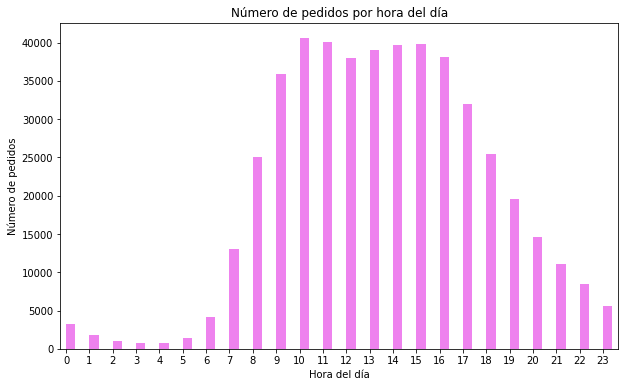

In [36]:
orders_per_hour = orders.groupby('order_hour_of_day')['user_id'].count()
orders_per_hour.plot(kind='bar', figsize=(10,6), color='violet', position=0, width=0.4)
print(orders_per_hour)
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.title('Número de pedidos por hora del día')
plt.show()

Escribe aquí tus conclusiones  
-Las horas de menor actividad en la aplicacion son entre las 2 y 4 am  
-La mayor cantidad de pedidos se reciben alrededor de las 10 am lo cual puede indicar que mucha gente realiza sus pedidos anticipandose al medio dia

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido! buena manera de graficar los resultados
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos. Sugeriría que graficaras los datos, de esta manera es más intuitivo revisarlo para personas de diferentes equipos de trabajo
</div>
<div class="alert alert-block alert-info">
<b>He agregado el grafico solicitado para mejor visualizacion de los datos</b> <a class="tocSkip"></a>
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

Número de personas que compran víveres para cada día de la semana:
order_dow
0    57661
1    56479
2    48587
3    45331
4    44281
5    46127
6    45604
Name: user_id, dtype: int64


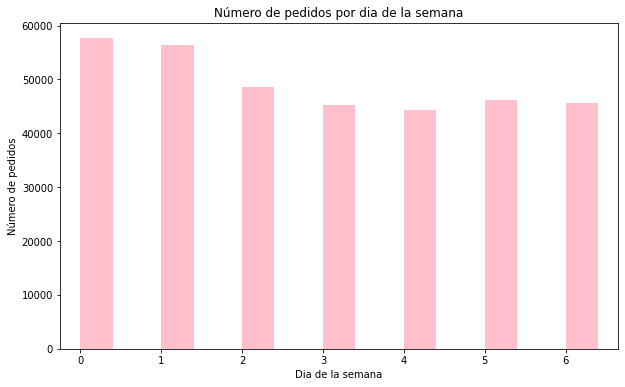

In [37]:
dow_id = orders.groupby('order_dow')['user_id'].nunique()
print("Número de personas que compran víveres para cada día de la semana:")
print(dow_id)
dow_id.plot(kind='bar', figsize=(10,6), color='pink', position=0, width=0.4)
plt.xlabel('Dia de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.title('Número de pedidos por dia de la semana')
plt.show()

Los dias que se registran mas compras son los domingos y lunes lo cual puede indicar que las personas compran los productos en estos dias para tener la provision semanal.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido! es muhco más fácil ver las variaciones de pedidos en los días
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Resultados correctos, sugeriría graficar los resultdos
</div>
<div class="alert alert-block alert-info">
<b>He agregado el grafico solicitado para mejor visualizacion de los datos</b> <a class="tocSkip"></a>
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

En promedio las personas tardan 11.101813900274362 dias en hacer otro pedido
La cantidad de dias minimos que una persona tarda en realizar otro pedido es de:  0.0
La cantidad de dias maximos que una persona tarda en realizar otro pedido es de:  30.0


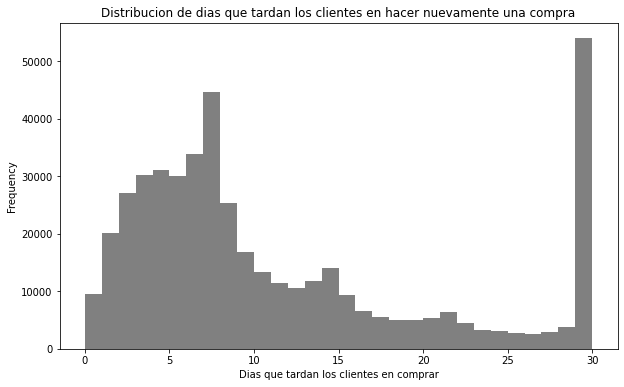

In [38]:
print('En promedio las personas tardan',orders['days_since_prior_order'].mean(), 'dias en hacer otro pedido')
print('La cantidad de dias minimos que una persona tarda en realizar otro pedido es de: ', orders['days_since_prior_order'].min())
print('La cantidad de dias maximos que una persona tarda en realizar otro pedido es de: ', orders['days_since_prior_order'].max())
orders['days_since_prior_order'].plot(kind='hist', bins=30, figsize=(10,6), color='grey')
plt.xlabel('Dias que tardan los clientes en comprar')
plt.title('Distribucion de dias que tardan los clientes en hacer nuevamente una compra')
plt.show()

Escribe aquí tus conclusiones  
-Hay personas que realizan pedidos el mismo dia ya que el minimo es 0  
-Las personas clientes tardan maximo 30 dias en volver a hacer un pedido 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido! Con esta gráfica podemos obtener más observaciones interesates, durante os primeros 9 días los usuarios hacen otro pedido y estos empiezan a decaer a partir del decimo día, al final vemos un pico interesante en el día 30, esto se puede deber a que el sistema trunca el número de días a 30 pero en realidad pueden ser pedidos de 30 o más días
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Esto recomiendo totalmente que sea una gráfica, aquí podrías observar que al reemplazar los valores ausentes en un ejercicio anterior afecta el promedio de los días, además de que puedes ver el comportamiento de los clientes a lo largo de los días
</div>
<div class="alert alert-block alert-info">
<b>He agregado el grafico solicitado</b> <a class="tocSkip"></a>
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

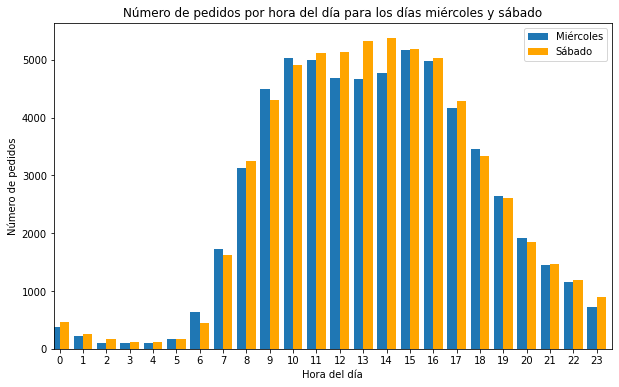

In [39]:
# Filtra los pedidos solo para los días miércoles (3) y sábados (6)
pedidos_miercoles = orders[orders['order_dow']==3]
pedidos_sabado = orders[orders['order_dow']==6]
# Agrupa por 'order_hour_of_day' y cuenta el número de pedidos
conteo_miercoles = pedidos_miercoles.groupby('order_hour_of_day')['order_id'].count()
conteo_sabado = pedidos_sabado.groupby('order_hour_of_day')['order_id'].count()
# Graficar
conteo_miercoles.plot(kind='bar', figsize=(10,6), position=1, width=0.4)
conteo_sabado.plot(kind='bar', figsize=(10,6), color='orange', position=0, width=0.4)
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.legend(['Miércoles', 'Sábado'])
plt.xticks(rotation=0)
plt.title('Número de pedidos por hora del día para los días miércoles y sábado')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buenos resultados y buena manera de mostrarlos
</div>


Escribe aquí tus conclusiones  
-Por lo general se suelen hacer mas pedidos los sabados que los miercoles.  
-El sabado a las 14 pm es cuando se realizan mas pedidos.  
-La menor cantidad de pedidos se realizan los miercoles entre las 2 y 4 am.  


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

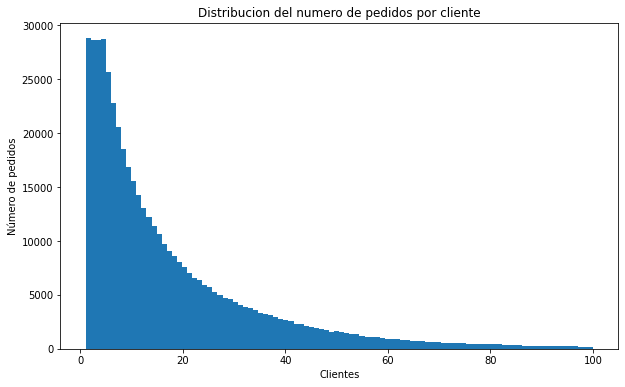

In [40]:
orders['order_number'].plot(kind='hist', bins=100, figsize=(10,6))
plt.xlabel('Clientes')
plt.ylabel('Número de pedidos')
plt.title('Distribucion del numero de pedidos por cliente')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, buen uso de la gráfica
</div>


Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [41]:
# Contar el número de veces que aparece cada producto en los pedidos
id_productos_populares = order_products.groupby('product_id')['order_id'].nunique().sort_values(ascending=False).head(20)
# Fusionar con los datos de los productos para obtener el nombre de los productos
productos_populares = pd.merge(id_productos_populares, products, on='product_id')
print("Los 20 productos más populares son:")
print(productos_populares[['product_id', 'product_name']])

Los 20 productos más populares son:
    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


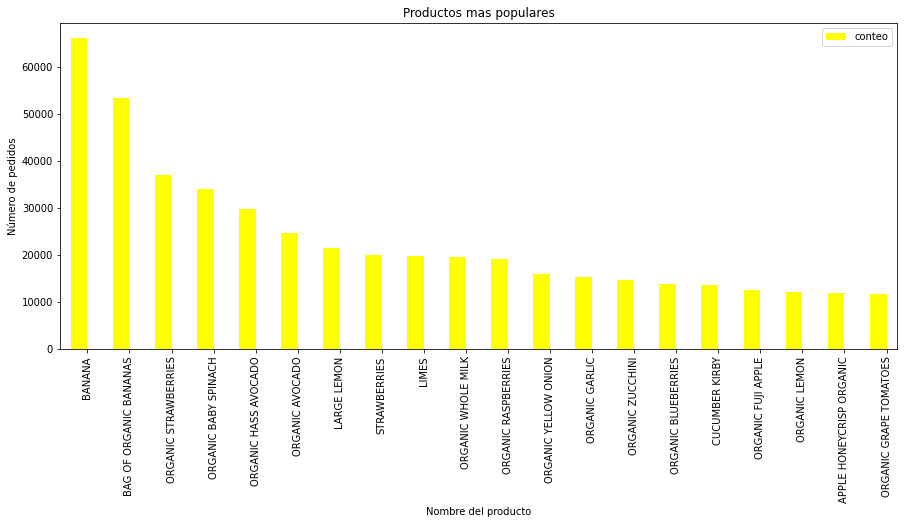

In [42]:
# Graficar
resultado_df = id_productos_populares.to_frame().reset_index().rename(columns={'order_id': 'conteo'})
productos_populares['conteo'] = resultado_df['conteo']
productos_populares.plot(kind='bar',x='product_name',y='conteo', figsize=(15,6), position=1, width=0.4, color='yellow')
plt.xlabel('Nombre del producto')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=90)
plt.title('Productos mas populares')
plt.show()

Escribe aquí tus conclusiones  
-Los productos organicos como frutas son las mas populares.  
-La mas popular es la banana.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, los clientes tienden a comprar productos orgánicos
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

El promedio de artículos por pedido es: 10.098983215049127


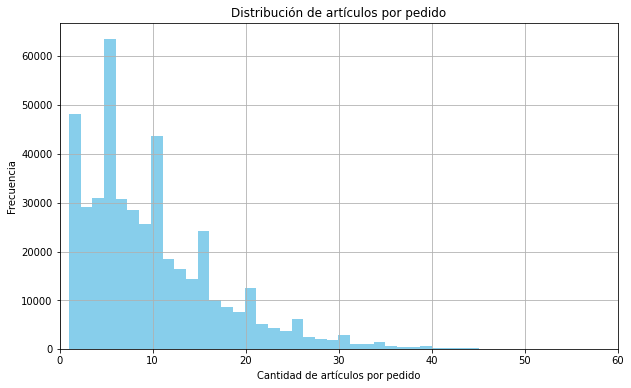

In [43]:
# Calcula el número de artículos por pedido
articulos_por_pedido = order_products.groupby('order_id')['product_id'].count()

# Calcula el promedio de artículos por pedido
promedio_articulos_por_pedido = articulos_por_pedido.mean()
print("El promedio de artículos por pedido es:", promedio_articulos_por_pedido)

# Graficar la distribución de artículos por pedido
plt.figure(figsize=(10,6))
plt.hist(articulos_por_pedido, bins=100, color='skyblue')
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de artículos por pedido')
plt.xlim(0, 60)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, los clientes tienden a comprar alrededor de 10 articulos
</div>


Escribe aquí tus conclusiones  
-La mayoria de pedidos no tienen mas de 10 articulos.  
-La mayoria de pedidos tiene alrededor de 5 articulos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [44]:
# Calcula la cantidad de veces que cada producto se vuelve a pedir
productos_vuelven_a_pedir = order_products[order_products['reordered'] == 1].groupby('product_id').size().reset_index(name='count')

# Ordena los productos por la cantidad de veces que se vuelven a pedir de mayor a menor y selecciona los primeros 20
top_20_productos_vuelven_a_pedir = productos_vuelven_a_pedir.sort_values(by='count', ascending=False).head(20)

# Fusiona con los datos de los productos para obtener los nombres de los productos
top_20_productos = pd.merge(top_20_productos_vuelven_a_pedir, products, on='product_id')

print("Los 20 principales artículos que se vuelven a pedir con mayor frecuencia son:")
print(top_20_productos[['product_id', 'product_name']])

Los 20 principales artículos que se vuelven a pedir con mayor frecuencia son:
    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF


Escribe aquí tus conclusiones  
-La lista es bastante similar a la de los productos mas pedidos.  
-El producto que se vuelve a pedir con mayor frecuencia es BANANA.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, los articulos que más se vuelven a comprar son parecidos a los veinte más populares
</div>


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [45]:
# Calcula la cantidad de veces que se pide y que se vuelve a pedir cada producto
conteo_productos = order_products.groupby('product_id')['reordered'].agg(total_pedidos='count', veces_vuelve_a_pedir='sum').reset_index()

# Fusiona con los datos de los productos para obtener los nombres de los productos
conteo_productos = pd.merge(conteo_productos, products, on='product_id')

# Calcula la proporción de las veces que se vuelve a pedir respecto a las veces que se pide para cada producto
conteo_productos['proporcion_vuelve_a_pedir'] = conteo_productos['veces_vuelve_a_pedir'] / conteo_productos['total_pedidos']

print("Proporción de las veces que se pide y que se vuelve a pedir para cada producto:")
print(conteo_productos[[ 'product_name', 'proporcion_vuelve_a_pedir']])

Proporción de las veces que se pide y que se vuelve a pedir para cada producto:
                                            product_name  \
0                             CHOCOLATE SANDWICH COOKIES   
1                                       ALL-SEASONS SALT   
2                   ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3      SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4                         PURE COCONUT WATER WITH ORANGE   
...                                                  ...   
45568                      HIGH PERFORMANCE ENERGY DRINK   
45569                      ORIGINAL PANCAKE & WAFFLE MIX   
45570    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571                             SPRING WATER BODY WASH   
45572                            BURRITO- STEAK & CHEESE   

       proporcion_vuelve_a_pedir  
0                       0.564286  
1                       0.000000  
2                       0.738095  
3                       0.510204  
4                       

Escribe aquí tus conclusiones  
-La proporcion no puede ser mayor a 1

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [46]:
newdf = pd.merge(orders, order_products, on='order_id')

In [47]:
productos_por_cliente = newdf.groupby('user_id')['product_id'].count().reset_index()

In [48]:
productos_por_cliente
productos_por_cliente['calculo'] = conteo_productos['veces_vuelve_a_pedir']/productos_por_cliente['product_id']
print(productos_por_cliente['calculo'])

0         6.076923
1         0.000000
2         2.583333
3         6.250000
4         0.071429
            ...   
149621         NaN
149622         NaN
149623         NaN
149624         NaN
149625         NaN
Name: calculo, Length: 149626, dtype: float64


In [49]:
# Calcula la cantidad de veces que se pide y que se vuelve a pedir cada producto
#los productos por persona los sacas uniendo todos los id de los productos agrupados por cada id de persona y sumados, mientras que los productos que ya habian ordenado se los saca filtrando el reordered.
# Calcula la proporción de las veces que se vuelve a pedir respecto a las veces que se pide para cada producto
pedidos_con_cliente = order_products.merge(orders[['order_id', 'user_id']], on='order_id')
total_productos_por_cliente = pedidos_con_cliente.groupby('user_id')['product_id'].count()
productos_unicos_por_cliente = pedidos_con_cliente.groupby('user_id')['product_id'].nunique()
proporcion_productos_ya_pedidos = productos_unicos_por_cliente / total_productos_por_cliente
proporcion_productos_ya_pedidos = proporcion_productos_ya_pedidos.reset_index()
print(proporcion_productos_ya_pedidos)


        user_id  product_id
0             2    0.961538
1             4    1.000000
2             5    1.000000
3             6    1.000000
4             7    0.928571
...         ...         ...
149621   206203    1.000000
149622   206206    0.809524
149623   206207    0.717391
149624   206208    0.640000
149625   206209    1.000000

[149626 rows x 2 columns]


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Corregido!
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
El código falla porque hay algunos errores, como esta linea:<br/>
productos_por_cliente['conteo_total'] = newdf.groupby('user_id')['product_id'].count() <br/>
productos_por_cliente aun no existe por lo que usar una columna de una dataframe que no existe es incorrecto, te dejo un código que sigue la lógica que has estado usando:<br/>
pedidos_con_cliente = order_products.merge(orders[['order_id', 'user_id']], on='order_id')<br/>
total_productos_por_cliente = pedidos_con_cliente.groupby('user_id')['product_id'].count()<br/>
productos_unicos_por_cliente = pedidos_con_cliente.groupby('user_id')['product_id'].nunique()<br/>
proporcion_productos_ya_pedidos = productos_unicos_por_cliente / total_productos_por_cliente<br/>
proporcion_productos_ya_pedidos = proporcion_productos_ya_pedidos.reset_index()<br/>
print(proporcion_productos_ya_pedidos)<br/>
</div>


<div class="alert alert-block alert-info">
<b>Muchas gracias por la aclaracion, mas arriba habia implementado el codigo para la creacion del dataframe pero se me paso por alto esta vez</b> <a class="tocSkip"></a>
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
# Primero, filtramos los productos que se agregaron primero en el carrito (add_to_cart_order == 1)
primeros_productos = order_products[order_products['add_to_cart_order'] == 1]

# Luego, contamos la frecuencia de cada producto que se agregó primero y seleccionamos los 20 principales
top_20_primeros_productos = primeros_productos['product_id'].value_counts().head(20)
top_20_primeros_productos_con_nombres = pd.merge(top_20_primeros_productos, products, left_index=True, right_on='product_id')

print("Los 20 principales artículos que las personas ponen primero en sus carritos son:")
print(top_20_primeros_productos_con_nombres[['product_id', 'product_name']])

Los 20 principales artículos que las personas ponen primero en sus carritos son:
       product_id                 product_name
24851       24852                       BANANA
13175       13176       BAG OF ORGANIC BANANAS
27844       27845           ORGANIC WHOLE MILK
21136       21137         ORGANIC STRAWBERRIES
47208       47209         ORGANIC HASS AVOCADO
21902       21903         ORGANIC BABY SPINACH
47765       47766              ORGANIC AVOCADO
19659       19660                 SPRING WATER
16796       16797                 STRAWBERRIES
27965       27966          ORGANIC RASPBERRIES
44631       44632   SPARKLING WATER GRAPEFRUIT
49234       49235          ORGANIC HALF & HALF
47625       47626                  LARGE LEMON
195           196                         SODA
38688       38689     ORGANIC REDUCED FAT MILK
26208       26209                        LIMES
12340       12341                HASS AVOCADOS
5784         5785  ORGANIC REDUCED FAT 2% MILK
27085       27086         

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto, una vez más los productos orgánicos estan presentes
</div>


Escribe aquí tus conclusiones  
-Lo primero que las personas agregan a su carrito han sido Bananas

### Conclusion general del proyecto:

In [51]:
print('El analisis de los datos ha permitido conocer las tendecias de pedidos que se han generado en la plataforma, lo cual nos permite saber el estado general de este negocio y ademas profundizar un poco mas en sus caracteristicas y metricas.')

El analisis de los datos ha permitido conocer las tendecias de pedidos que se han generado en la plataforma, lo cual nos permite saber el estado general de este negocio y ademas profundizar un poco mas en sus caracteristicas y metricas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas, las correcciones se realizaron apropiadamente y los procedimientos realizados son correctos, este es un ejercicio que se asemeja bastante a algunas tareas reales que se hacen en las empresas, estos análisis son muy útiles para crear nuevas estrategias de marketing o para hacer los procesos en el almacén más eficientes.
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!

</div>
